In [1]:
%pip install pillow
%pip install numpy
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import display

# First step - Single image

In [3]:
from PIL import Image,ImageDraw;

# The core structure
img = Image.new("RGB",(128,128),color= "white")

In [4]:
# Object that can be printed out
draw = ImageDraw.Draw(img)


draw.circle((64,64),radius=30,fill="black")

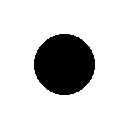

In [5]:
display(img)

# Second step - Make a bunch of random image

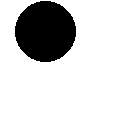

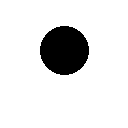

[None, None]

In [6]:
import random

l = []
for i in range(5000):
    img = Image.new("RGB",(128,128),"white")
    draw = ImageDraw.Draw(img)
    # Stay in side
    radius = random.randint(10,40)
    # For now we ensure the shape is inside the canva
    center = (random.randint(radius,128-radius),random.randint(radius,128-radius))
    draw.circle(xy=center,radius=radius,fill="black")
    l.append(img)
    img.save(f"data/train/circles/{i}.png")

[display(img) for img in l[50:52]]


In [7]:
l = []
for i in range(5000):
    img = Image.new("RGB",(128,128),"white")
    draw = ImageDraw.Draw(img)
    points = [
    (random.randint(10, 118), random.randint(10, 118)),
    (random.randint(10, 118), random.randint(10, 118)),
    (random.randint(10, 118), random.randint(10, 118)),
]
    draw.polygon(points,fill="black")
    l.append(img)
    img.save(f"data/train/triangles/{i}.png")

# Third make the model


# 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    

In [ ]:
# A nice way to get the accelerato (whonever is training)
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

class ShapeCNN(nn.Module):
    # Define the layers of the neural net
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1)

        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)


        # Diminish our image size by 2, note that does make it so it need to be divisible by 2 our input
        self.pool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )

    # How tensors are treated as we move along the net neurons
    def forward(self,x):
        # Relu can be used via nn but that also means a layer 
        # Here we are in summary ignoring negative values and making positive values variant, technically nn has a relu function too
        x = F.relu(self.conv1(x))
        x = self.pool(x)


# A nice way to see my model layers
model = ShapeCNN().to(device)
model

Using cuda device


ShapeCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)